**Задача** состоит в том, чтобы создать алгоритмы для определения вероятности принадлежности объектов к каждой из 14 рассматриваемых категорий. **Цель** состоит в том, чтобы использовать данные предсказания на пользу, прибыльность бизнеса.

Для оценки качества полученного результата будет использоваться **метрика LogLoss**. 
<br>По каждой из 14 категорий метрика считается независимо, затем берется среднее арифметическое значений метрик, полученных для категорий.

Задача обучения с учителем (**supervised learning**).

---

## Exploratory data analysis: part I

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import time

from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

In [2]:
train = pd.read_csv(r'.\Data\problem_train.csv')
test = pd.read_csv(r'.\Data\problem_test.csv')

labels = pd.read_csv(r'.\Data\problem_labels.csv')

In [3]:
bold('**Shape of our train, test & labels data:**')
display(train.shape, test.shape, labels.shape)

**Shape of our train, test & labels data:**

(8000, 1379)

(2000, 1379)

(8000, 15)

In [4]:
bold('**Train data information:**')
display(train.info())

**Train data information:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Columns: 1379 entries, id to c_1377
dtypes: float64(345), int64(9), object(1025)
memory usage: 84.2+ MB


None

In [5]:
bold('**Train columns:**')
display(list(train.columns)[:15] + list(train.columns)[-5:])

**Train columns:**

['id',
 'release',
 'n_0000',
 'n_0001',
 'n_0002',
 'n_0003',
 'n_0004',
 'n_0005',
 'n_0006',
 'n_0007',
 'n_0008',
 'n_0009',
 'n_0010',
 'n_0011',
 'n_0012',
 'c_1373',
 'c_1374',
 'c_1375',
 'c_1376',
 'c_1377']

In [6]:
bold('**Test data information:**')
display(test.info())

**Test data information:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 1379 entries, id to c_1377
dtypes: float64(457), int64(9), object(913)
memory usage: 21.0+ MB


None

In [7]:
bold('**Test columns:**')
display(list(test.columns)[:15] + list(test.columns)[-5:])

**Test columns:**

['id',
 'release',
 'n_0000',
 'n_0001',
 'n_0002',
 'n_0003',
 'n_0004',
 'n_0005',
 'n_0006',
 'n_0007',
 'n_0008',
 'n_0009',
 'n_0010',
 'n_0011',
 'n_0012',
 'c_1373',
 'c_1374',
 'c_1375',
 'c_1376',
 'c_1377']

In [8]:
bold('**Labels data information:**')
display(labels.info())

**Labels data information:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         8000 non-null   int64
 1   service_a  8000 non-null   int64
 2   service_b  8000 non-null   int64
 3   service_c  8000 non-null   int64
 4   service_d  8000 non-null   int64
 5   service_e  8000 non-null   int64
 6   service_f  8000 non-null   int64
 7   service_g  8000 non-null   int64
 8   service_h  8000 non-null   int64
 9   service_i  8000 non-null   int64
 10  service_j  8000 non-null   int64
 11  service_k  8000 non-null   int64
 12  service_l  8000 non-null   int64
 13  service_m  8000 non-null   int64
 14  service_n  8000 non-null   int64
dtypes: int64(15)
memory usage: 937.6 KB


None

In [9]:
train_cols = list(train.columns)
test_cols = list(test.columns)

print('Unique cols in train:', list(set(train_cols) - set(test_cols)))
print('Unique cols in test:', list(set(test_cols) - set(train_cols)))

Unique cols in train: []
Unique cols in test: []


In [10]:
train_noNas = list(train.iloc[:, list(train.isnull().any() == False)].columns)

bold("**Columns with no missing values in train data:**")
display(
    len(train_noNas),
    train_noNas
)

**Columns with no missing values in train data:**

32

['id',
 'release',
 'n_0047',
 'n_0050',
 'n_0052',
 'n_0061',
 'n_0067',
 'n_0075',
 'n_0078',
 'n_0091',
 'n_0108',
 'n_0109',
 'o_0176',
 'o_0264',
 'c_0466',
 'c_0500',
 'c_0638',
 'c_0699',
 'c_0738',
 'c_0761',
 'c_0770',
 'c_0838',
 'c_0870',
 'c_0980',
 'c_1145',
 'c_1158',
 'c_1189',
 'c_1223',
 'c_1227',
 'c_1244',
 'c_1259',
 'c_1348']

In [11]:
bold("**Columns with gaps in train data:**")
display(
    train.isna().any().sum(),
    round(train.isna().any().mean() * 100, 2)
)

**Columns with gaps in train data:**

1347

97.68

Из 1347 (97.68%) столбцов 1379 имеют пропущенные данные.

In [12]:
train_nas = train.iloc[:, list(train.isnull().sum() / len(train) * 100 == 100)].columns
print(train_nas, '\n', len(train_nas), sep='')

Index(['n_0101', 'o_0224', 'o_0257', 'o_0308', 'c_0491', 'c_0529', 'c_0541',
       'c_0596', 'c_0632', 'c_0644', 'c_0693', 'c_0708', 'c_0710', 'c_0763',
       'c_0784', 'c_0803', 'c_0848', 'c_0902', 'c_0959', 'c_1009', 'c_1072',
       'c_1129', 'c_1148', 'c_1168', 'c_1230', 'c_1257', 'c_1277', 'c_1281',
       'c_1308', 'c_1332'],
      dtype='object')
30


Вот такие стоит просто удалить, полагаю, раз они не содержат никакой информации (```NA``` потенциально может содержать какую-то информацию, но не здесь).

In [13]:
test_noNas = list(test.iloc[:, list(test.isnull().any() == False)].columns)

bold("**Columns with no missing values in test data:**")
display(
    len(test_noNas),
    test_noNas
)

**Columns with no missing values in test data:**

34

['id',
 'release',
 'n_0047',
 'n_0050',
 'n_0052',
 'n_0061',
 'n_0067',
 'n_0075',
 'n_0078',
 'n_0091',
 'n_0108',
 'n_0109',
 'o_0176',
 'o_0264',
 'c_0368',
 'c_0466',
 'c_0500',
 'c_0638',
 'c_0699',
 'c_0738',
 'c_0761',
 'c_0770',
 'c_0838',
 'c_0870',
 'c_0980',
 'c_0996',
 'c_1004',
 'c_1145',
 'c_1158',
 'c_1189',
 'c_1223',
 'c_1227',
 'c_1244',
 'c_1259']

Распределение не совпадает с train'ом.

In [14]:
bold("**Columns with gaps in test data:**")
display(
    test.isna().any().sum(),
    round(test.isna().any().mean() * 100, 2)
)

**Columns with gaps in test data:**

1345

97.53

Проценты тут тоже немного отличаются. Но кажется, что не существенно.
<br>Но все равно стоит помнить о возможности переобучиться.

Есть ли полностью NA'шные стобцы?

In [15]:
test_nas = test.iloc[:, list(test.isnull().sum() / len(test) * 100 == 100)].columns
print(test_nas, '\n', len(test_nas), sep='')

Index(['n_0008', 'n_0011', 'n_0055', 'n_0101', 'n_0111', 'o_0117', 'o_0121',
       'o_0122', 'o_0126', 'o_0149',
       ...
       'c_1288', 'c_1292', 'c_1308', 'c_1312', 'c_1332', 'c_1334', 'c_1349',
       'c_1360', 'c_1368', 'c_1371'],
      dtype='object', length=179)
179


In [16]:
len(train_nas) == len(test_nas)

False

Пожалуй, стоит избавить из объединения NA'шных столбцов в обоих датафреймах: в train'е, чтобы не переобучиться.

In [17]:
bold("**Columns, where no NAs in both train and test data:**")
display(
    len(list(set(train_noNas) & set(test_noNas))),
    list(set(train_noNas) & set(test_noNas))
)

**Columns, where no NAs in both train and test data:**

31

['c_1189',
 'n_0052',
 'o_0176',
 'n_0075',
 'c_0638',
 'n_0050',
 'c_0466',
 'c_0770',
 'o_0264',
 'c_1223',
 'n_0047',
 'n_0078',
 'c_0838',
 'c_1227',
 'n_0108',
 'n_0067',
 'c_0699',
 'c_0738',
 'c_0870',
 'c_1244',
 'n_0091',
 'n_0061',
 'id',
 'release',
 'n_0109',
 'c_1158',
 'c_1259',
 'c_0761',
 'c_0980',
 'c_0500',
 'c_1145']

In [18]:
bold("**Columns, where only NAs in both train and test data:**")
display(
    len(list(set(train_nas) & set(test_nas))),
    list(set(train_nas) & set(test_nas))
)

**Columns, where only NAs in both train and test data:**

25

['c_1257',
 'c_1308',
 'c_1230',
 'c_0803',
 'c_0693',
 'c_0763',
 'c_0541',
 'c_0632',
 'c_0529',
 'c_0491',
 'c_1009',
 'c_0710',
 'c_1148',
 'c_1277',
 'c_0784',
 'c_0708',
 'c_0596',
 'n_0101',
 'c_0902',
 'c_1129',
 'c_1168',
 'c_1332',
 'c_1281',
 'c_0848',
 'c_0959']

In [19]:
flag = len(list(train['id'].values) + list(test['id'].values)) - len(set(list(train['id'].values) + list(test['id'].values)))

bold("**The number of duplicates in the test 'id' column that are in the train 'id' column:**")
display(
    flag
)

**The number of duplicates in the test 'id' column that are in the train 'id' column:**

0

In [20]:
train.head(7)

,id,release,n_0000,n_0001,n_0002,n_0003,n_0004,n_0005,n_0006,n_0007,...,c_1368,c_1369,c_1370,c_1371,c_1372,c_1373,c_1374,c_1375,c_1376,c_1377
0,11193,a,NaN,NaN,0.025449,NaN,NaN,0.368421,NaN,NaN,...,NaN,NaN,NaN,NaN,a,NaN,q,NaN,NaN,NaN
1,11382,a,NaN,NaN,0.031297,NaN,NaN,0.315789,NaN,NaN,...,NaN,NaN,a,NaN,a,NaN,NaN,NaN,NaN,NaN
2,16531,a,NaN,NaN,0.024475,NaN,NaN,0.342105,NaN,NaN,...,NaN,NaN,a,NaN,a,NaN,b,NaN,NaN,NaN
3,1896,a,NaN,NaN,0.041694,NaN,NaN,0.447368,NaN,NaN,...,NaN,NaN,NaN,NaN,a,NaN,NaN,NaN,NaN,NaN
4,18262,c,NaN,NaN,0.038120,NaN,NaN,0.315789,NaN,NaN,...,NaN,NaN,b,NaN,a,NaN,a,NaN,NaN,NaN
5,10540,b,NaN,NaN,0.039420,NaN,NaN,0.368421,NaN,NaN,...,NaN,NaN,NaN,NaN,a,NaN,NaN,NaN,NaN,NaN
6,5244,c,NaN,NaN,0.050141,NaN,NaN,0.394737,0.2,NaN,...,NaN,NaN,NaN,NaN,a,NaN,NaN,NaN,NaN,NaN


In [21]:
labels.head(7)

,id,service_a,service_b,service_c,service_d,service_e,service_f,service_g,service_h,service_i,service_j,service_k,service_l,service_m,service_n
0,11193,1,1,0,0,0,0,0,0,0,1,1,0,0,0
1,11382,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2,16531,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,1896,0,0,0,1,0,0,0,0,0,1,0,1,0,0
4,18262,0,0,0,1,1,0,0,0,0,0,1,1,1,0
5,10540,1,1,1,0,0,0,0,1,1,1,0,0,0,0
6,5244,0,0,0,0,0,0,0,0,0,1,1,0,0,1


In [22]:
test.head(7)

,id,release,n_0000,n_0001,n_0002,n_0003,n_0004,n_0005,n_0006,n_0007,...,c_1368,c_1369,c_1370,c_1371,c_1372,c_1373,c_1374,c_1375,c_1376,c_1377
0,7957,a,NaN,NaN,0.029890,NaN,NaN,0.368421,NaN,NaN,...,NaN,NaN,NaN,NaN,a,NaN,q,NaN,NaN,NaN
1,693,c,NaN,0.452381,0.032164,NaN,NaN,0.421053,0.0,NaN,...,NaN,NaN,NaN,NaN,a,NaN,x,NaN,NaN,NaN
2,15558,c,NaN,0.547619,0.049166,NaN,NaN,0.500000,0.2,NaN,...,NaN,NaN,NaN,NaN,a,e,b,NaN,NaN,NaN
3,15614,a,NaN,NaN,0.048733,NaN,NaN,0.394737,NaN,NaN,...,NaN,NaN,NaN,NaN,b,NaN,NaN,NaN,NaN,NaN
4,8149,b,NaN,NaN,0.049924,NaN,NaN,0.368421,NaN,NaN,...,NaN,NaN,NaN,NaN,a,NaN,NaN,NaN,NaN,b
5,711,b,NaN,NaN,0.022525,NaN,NaN,0.368421,NaN,NaN,...,NaN,NaN,NaN,NaN,a,NaN,NaN,NaN,NaN,NaN
6,12177,a,NaN,NaN,0.051874,NaN,NaN,0.368421,NaN,NaN,...,NaN,NaN,NaN,NaN,a,NaN,q,NaN,NaN,a


- Нужно ли вообще избавиться от полностью NA'шных колонок и в train, и в test (одновременно)?
- Нужно ли вообще избавиться от полностью NA'шных колонок?
- Если не NA'шек очень мало, стоит ли это пытаться зафилливать или лучше избавиться?


- Проверить, что если оставить только full no NAs столбцы


- Мб зафилливать, например, категориальные столбцы и не нужно, а лишь использовать векторное кодирование (где NA = 0, где буквы - какие-то не нулевые значения в векторе)?
- Вообще, SVD есть и вот это все дело с понижением размерности / низкоранговым приближением

---

## Exploratory data analysis: part II

In [23]:
bold("**How many labels are there on average per object?:**")
display(
    round(labels.iloc[:, 1:].sum(axis=1).mean(), 2)
)

**How many labels are there on average per object?:**

3.53

Посмотрим на соотношение классов:

In [24]:
bold("**The ratio of classes in the train data:**")
display(
    round(labels.iloc[:, 1:].sum() / labels.shape[0] * 100, 2)
)

**The ratio of classes in the train data:**

service_a    47.21
service_b    32.82
service_c    26.16
service_d     1.70
service_e     5.39
service_f     2.91
service_g     5.19
service_h    29.70
service_i     1.61
service_j    84.82
service_k    78.20
service_l    10.80
service_m     8.86
service_n    17.80
dtype: float64

Похоже, задача еще с явным дисбалансом классов, раз service_j >> service_d.

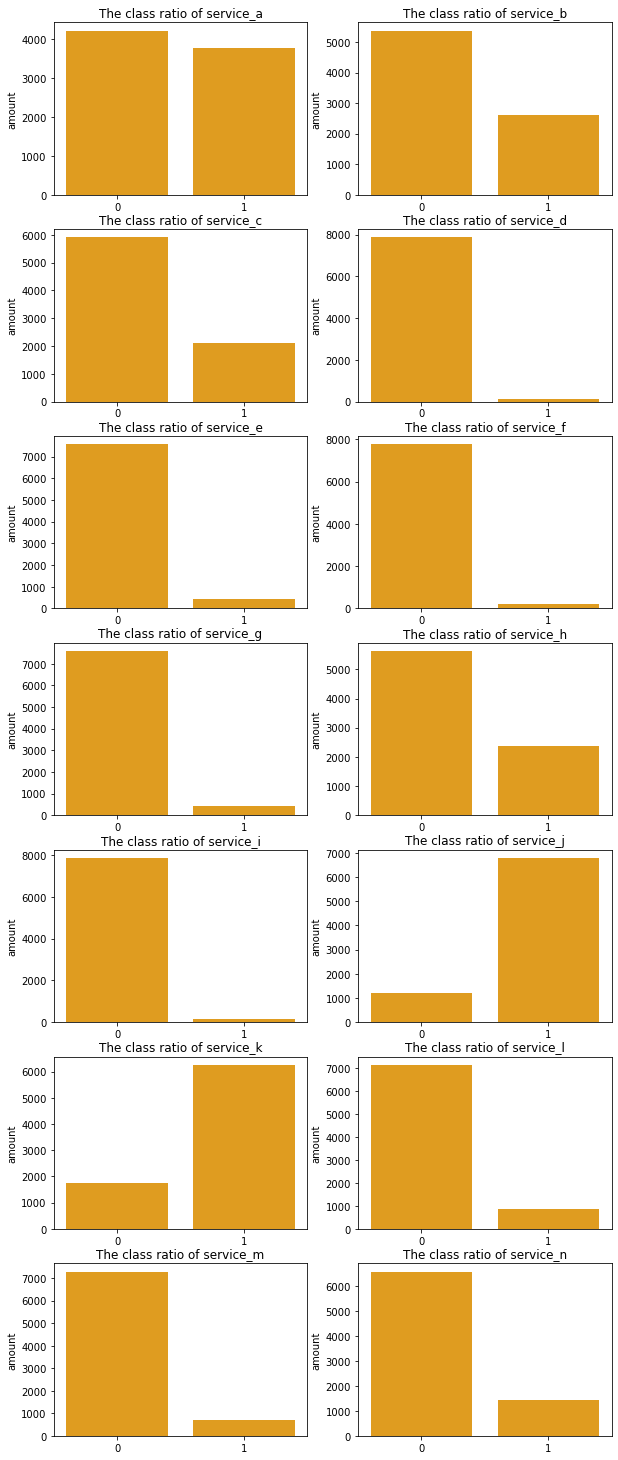

In [25]:
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(10,26))

iters = [i for i, j in zip([i for i in range(0, 7)], [2 for i in range(0, 7)]) for k in range(j)]
for col, i in zip(labels.iloc[:, 1:].columns, range(0, len(labels))):
    sns.countplot(x=col, 
                  data=labels, 
                  color='Orange',
                  ax=ax[iters[i]][i % 2])
    
    ax[iters[i]][i % 2].set_xlabel("")
    ax[iters[i]][i % 2].set_ylabel("amount")
    ax[iters[i]][i % 2].set_title('The class ratio of ' + col)

Попробуем посмотреть на распределение меток в зависимости от сервиса:

In [26]:
import matplotlib.patches as mpatches

from sklearn.decomposition import PCA, TruncatedSVD

In [27]:
noNAs = list(set(train_noNas) & set(test_noNas))
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']


# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(train[noNAs].select_dtypes(include=numerics).values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))


# TruncatedSVD Implementation
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(train[noNAs].select_dtypes(include=numerics).values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

PCA took 0.022 s
Truncated SVD took 0.016 s


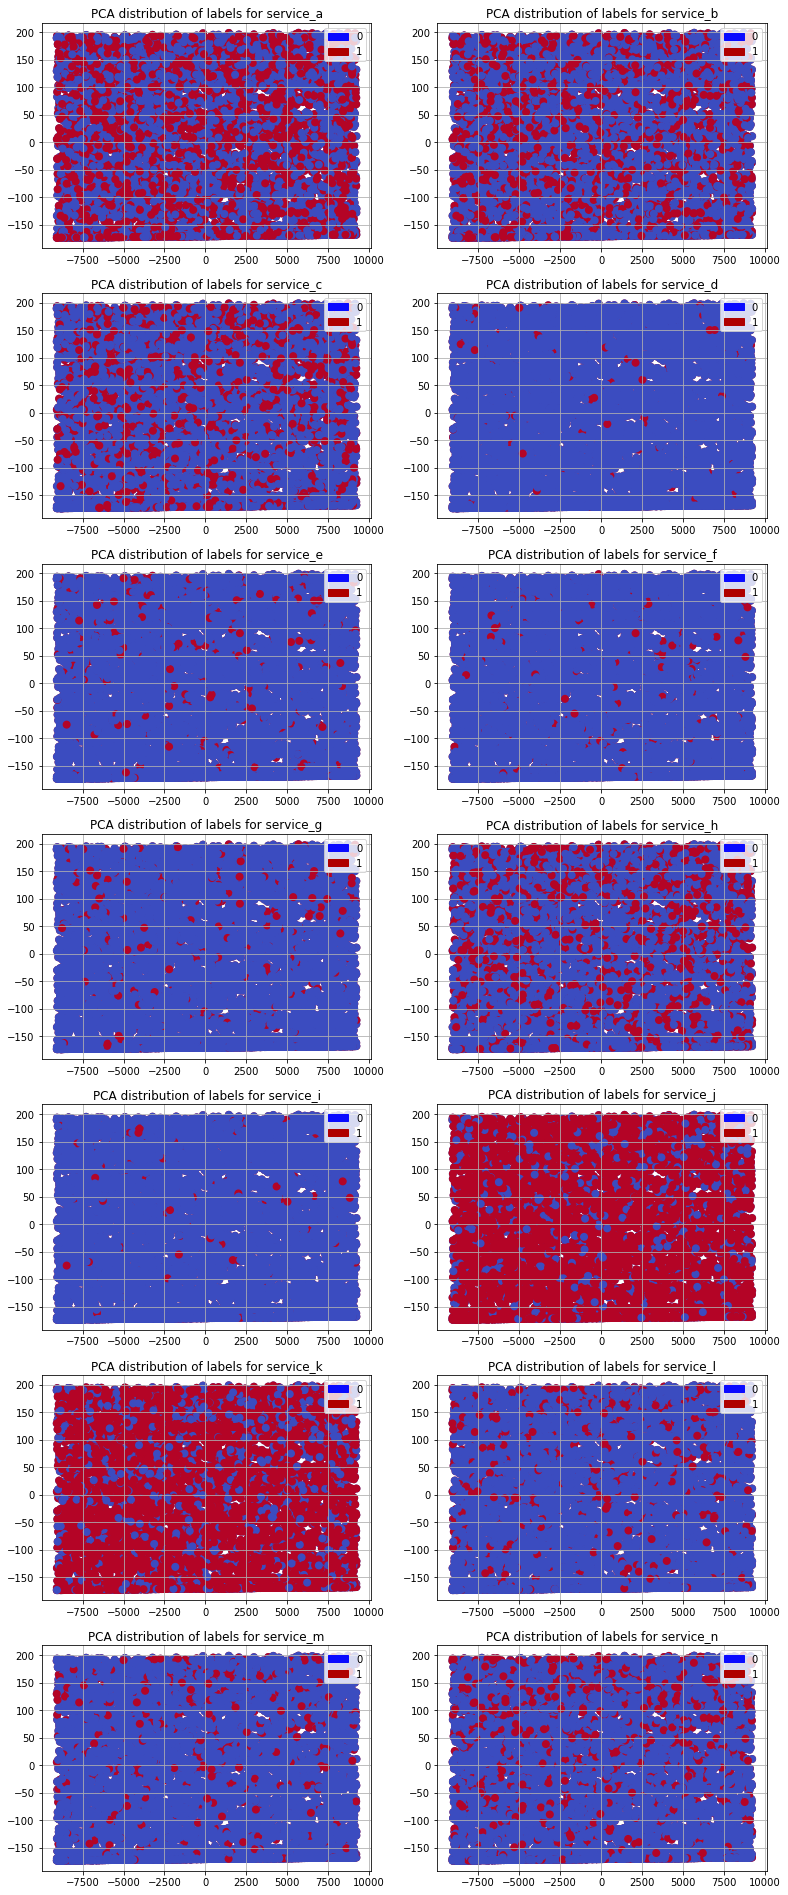

In [28]:
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(13,34))

iters = [i for i, j in zip([i for i in range(0, 7)], [2 for i in range(0, 7)]) for k in range(j)]
for col, i in zip(labels.iloc[:, 1:].columns, range(0, len(labels))):
    
    blue_patch = mpatches.Patch(color='#0A0AFF', label='0')
    red_patch = mpatches.Patch(color='#AF0000', label='1')
    
    ax[iters[i]][i % 2].scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(labels[col] == 0), cmap='coolwarm', label='0', linewidths=2)
    ax[iters[i]][i % 2].scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(labels[col] == 1), cmap='coolwarm', label='1', linewidths=2)

    ax[iters[i]][i % 2].set_xlabel("")
    ax[iters[i]][i % 2].set_ylabel("")
    ax[iters[i]][i % 2].set_title('PCA distribution of labels for ' + col)
    ax[iters[i]][i % 2].grid(True)
    ax[iters[i]][i % 2].legend(handles=[blue_patch, red_patch])

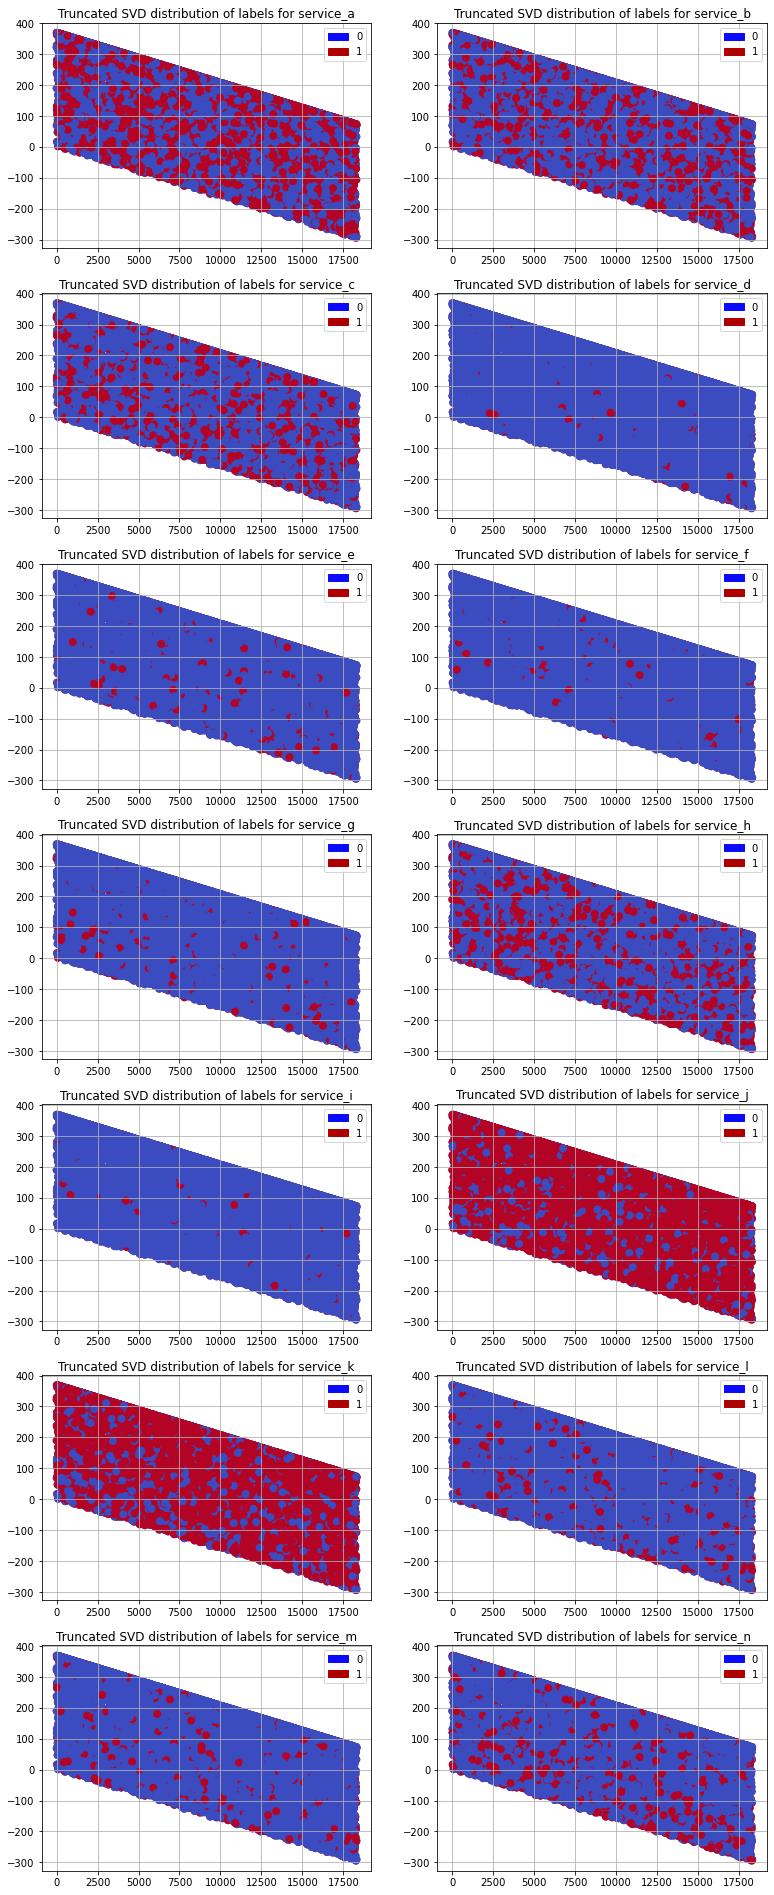

In [29]:
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(13,34))

iters = [i for i, j in zip([i for i in range(0, 7)], [2 for i in range(0, 7)]) for k in range(j)]
for col, i in zip(labels.iloc[:, 1:].columns, range(0, len(labels))):
    
    blue_patch = mpatches.Patch(color='#0A0AFF', label='0')
    red_patch = mpatches.Patch(color='#AF0000', label='1')
    
    ax[iters[i]][i % 2].scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(labels[col] == 0), cmap='coolwarm', label='0', linewidths=2)
    ax[iters[i]][i % 2].scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(labels[col] == 1), cmap='coolwarm', label='1', linewidths=2)

    ax[iters[i]][i % 2].set_xlabel("")
    ax[iters[i]][i % 2].set_ylabel("")
    ax[iters[i]][i % 2].set_title('Truncated SVD distribution of labels for ' + col)
    ax[iters[i]][i % 2].grid(True)
    ax[iters[i]][i % 2].legend(handles=[blue_patch, red_patch])

Да, сами по себе разложение на только no NAs какие-то useless, и только no NAs не будет иметь смысла использовать.
<br>Единственное, что кажется, что метки более-менее равномерно могут быть распределены на объектах.

---

## Metric understanding

### Binary LogLoss

Рассмотрим задачу бинарной классификации. Пусть на объектах нашей обучающей выборки $X$ имеется распределение на ответах $Y$: $p(y = +1|x)$. Хотим, чтобы алгоритм $b(x)$ возвращал число из отрезка $[0; 1]$. Наша задача - выбрать для него такую процедуру обучения, что в точке $x$ ему будет оптимально выдавать число $p(y = +1|x)$. Если в выборке $X$ объект $x$ встречается $n$ раз с ответами $\{y_1, y_2, \ldots, y_n\}$, то получаем следующее требование: 
$${arg\,min}_{b \in {\rm I\!R}} \ \frac{1}{n}\sum\limits_{i=1}^{n} L(y_i, b) \approx p(y = +1 | x)$$
При стремплении n к бесконечности получим, что функционал стремится к мат ожиданию ошибки:
$${arg\,min}_{b \in {\rm I\!R}} \ {\rm I\!E}(L(y, b) | x) = p(y = +1 | x)$$

<br>Если алгоритм действительно выдает вероятности, то они должны согласовываться с выборкой. С точки зрения алгоритма вероятность того, что в выборке встретится объект $x_i$ с классом $y_i$ равна $b(x_i)^{[y_i = +1]} (1 - b(x_i))^{[y_i = -1]}$. Исходя из этого, можно записать правдоподобие выборки (т.е. вероятность получить такую выборку с точки зрения алгоритма):
$$Q(a, X) = \prod\limits_{i=1}^{l} b(x_i)^{[y_i = +1]} (1 - b(x_i))^{[y_i = -1]}$$
Логарифм данного правдоподобия удобнее использовать как функционал для обучения алгоритма:
$$- \sum\limits_{i=1}^{l} ([y_i = +1] \log b(x_i) + [y_i = -1] \log (1 - b(x_i))) \ \rightarrow \ min$$
Получили **логарифмическую функцию потерь** для задачи бинарной классификации.

<br>Покажем, что она позволяет корректно предсказывать вероятности. Запишем мат ожиданием функции потерь в точке $x$:
$${\rm I\!E}\left[L(y, b) \ | \ x\right) = {\rm I\!E}\left[ -[y = +1] \log b - [y = -1] \log (1 - b) \ | \ x \right] = \\ 
-p(y = +1 \ | \ x) \log b - (1 - p(y = +1 \ | \ x))\log (1 - b)$$
Дифференцируя по b:
$$-\frac{p(y = +1 \ | \ x)}{b} + \frac{1 - p(y = +1 \ | \ x)}{1-b} = 0$$
Получаем отимальный ответ алгоритма:
$$b_* = p(y = +1 \ | \ x)$$

<br>---
<br>Заметим, что также полученное здесь выражение 
$$ -p(y = +1 \ | \ x) \log b - (1 - p(y = +1 \ | \ x))\log (1 - b) \quad \leftrightarrow  \quad -p \log p - (1 - p) \log (1 - p)$$
есть *энтропия*. А это объясняет, почему при построении решающих деревьев в задачах классификации используется как раз энтропийный критерий: оценка принадлежности к классу 1 часто производится с помощью среднего арифметического меток в листе. Для конкретного дерева эта вероятность будет одинакова для всех объектов в листе, т.е. константой. Получается, что энтропия в листе примерно равна logloss ошибке константного решения.
<br>---

<br>Везде выше требовалось, чтобы алгоритм $b(x)$ возвращал числа из $[0; 1]$. Этого легко достичь, если положить $b(x) = \sigma (\langle w, x\rangle)$, где в качестве $\sigma$ подойдет любая монотоннно неубывающая функция с областью значений $[0; 1]$. Например $\sigma (z) = \frac{1}{1 + \exp(-z)}$. Чем больше скалярное произведение $\langle w, x \rangle$, тем больше будет предсказанная вероятность.

<br>Интерпретация данного скалярного выражения:
$$p(y = +1 \ | \ x) = \frac{1}{1 - \exp (-\langle w, x \rangle )} \quad \rightarrow \quad \langle w, x \rangle = \log \frac{p(y = +1 \ | \ x)}{p(y = -1 \ | \ x)}$$
Подставим трансформированный ответ линейной модели в логарифмическую функцию (logloss) потерь:
$$- \sum\limits_{i=1}^{l} \left( [y_i = +1] \log \frac{1}{1 + \exp (-\langle w, x_i \rangle )} + [y_i = -1] \log \frac{\exp (-\langle w, x_i \rangle )}{1 + \exp (-\langle w, x_i \rangle )}\right) = \\ 
\sum\limits_{i=1}^{l} \log (1 + \exp (-y_i \langle w, x_i \rangle))$$
Полученная функция в точности представляет собой **логистические потери**, упомянутые ранее. Такая линейная модель классификации, настроенная путем минимизации данного функционала, оптимизирует правдоподобие выборки и дает корректные *оценки* вероятности принадлежности к положительному классу.

<br>Само по себе выражение $y_i \langle w, x_i \rangle$ – это своего рода "уверенность" модели в классификации объекта $x_i$:
* если отступ большой (по модулю) и положительный, это значит, что метка класса поставлена правильно, а объект находится далеко от разделяющей гиперплоскости (такой объект классифицируется уверенно);
* если отступ большой (по модулю) и отрицательный, значит метка класса поставлена неправильно, а объект находится далеко от разделяющей гиперплоскости (скорее всего такой объект – аномалия, например, его метка в обучающей выборке поставлена неправильно);
* если отступ малый (по модулю), то объект находится близко к разделяющей гиперплоскости, а знак отступа определяет, правильно ли объект классифицирован.

<br>Также заметим, что в случае полностью рандомизированного алгоритма ($p = \frac{1}{2}$), выдающего метки чисто случайным образом, получим следующий logloss:
$$-\frac{1}{2} \log \frac{1}{2} - (1 - \frac{1}{2}) \log (1 - \frac{1}{2}) \approx 0.693$$

In [30]:
import scipy as sp
from sklearn.metrics import log_loss

In [31]:
def logloss_multi(actual, predicted):
    
    epsilon = 1e-15
    predicted = sp.maximum(epsilon, predicted)
    predicted = sp.minimum(1-epsilon, predicted)
    
    llm = -1.0 * sum(
        np.einsum(
            'ij,ij->i', 
            actual, 
            np.log(predicted)
        )
    ) / actual.shape[0]
    
    return llm

In [32]:
actual_our = np.matrix([[1, 0],
                        [0, 1]])
predicted_our = np.matrix([[0.5, 0.5],
                           [.5, .5]])

actual_skl = np.matrix([0, 1])
predicted_skl = np.matrix([0.5, 0.5])

print(logloss_multi(actual_our, predicted_our))
print(log_loss(actual_skl, predicted_skl))

0.6931471805599453
0.6931471805599453


Как минимум для бинарной классификации наша функция-метрика работает.

Проблема в том, что все библиотечные алгоритмы работают с 1d-array'ми, т.е. с непересекающимися мультиклассами: один объект принимает только один из K классов. Поэтому я буду использовать библиотечные алгоритмы, делать предсказания отдельно для каждого из 14 классов, а потом брать среднее арифметическое logloss'ов по 14 классам.

---

## Baseline models

Обучим в качестве baseline моделей, собственно, все основные алгоритмы (и их основные разновидности).

In [33]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

Удалим столбец ```id```, как учили деды.

In [34]:
train = train.drop('id', axis=1)
test = test.drop('id', axis=1)
labels = labels.drop('id', axis=1)

Сразу же выбросим объединение NA'шных столбцов.

In [35]:
nas_cols = list(set(train_nas) | set(test_nas))
train = train.drop(nas_cols, axis=1)
test = test.drop(nas_cols, axis=1)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(train, labels, 
                                                    test_size=0.25, random_state=43)

Сначала попробуем из коробки, а потом на кросс-валидации.
<br>Причем попробуем только на столбцах полностью без пропусков.

In [37]:
train_noNas = list(train.iloc[:, list(train.isnull().any() == False)].columns)
test_noNas = list(test.iloc[:, list(test.isnull().any() == False)].columns)
noNAs = list(set(train_noNas) & set(test_noNas))

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

In [38]:
lr = LogisticRegression(
    solver='lbfgs',
    random_state=42,
    n_jobs=-1
)

svc = SVC(
    kernel='sigmoid',
    probability=True,
    random_state=42
)

# Данные нужно нормализовать, но они тут на глаз (да, не хорошо) все на [0, 1]
knnc = KNeighborsClassifier(
    n_neighbors=6,    ## В среднем у нас объект всего к чуть больше, чем 3м классам принадлежит
    radius=0.25,
    n_jobs=-1
)

lgbmc = LGBMClassifier()

cbc = CatBoostClassifier(verbose=0)


models = {
    'LR': lr,
    'SVC': svc,
    'kNNC': knnc,
    'LGBM': lgbmc,
    'CB': cbc
}
predicts = []

In [39]:
for m in range(0, len(models)):
    model = list(models.values())[m]
    model_name = list(models)[m]
        
    t0 = time.time()
    
    for K in range(0, labels.shape[1]):
        model.fit(X_train[noNAs].select_dtypes(include=numerics), y_train.iloc[:, K])
        y_pred = model.predict_proba(X_test[noNAs].select_dtypes(include=numerics))[:, 1]
            
        predicts.append(log_loss(y_test.iloc[:, K], y_pred))
        print(model_name + " " + str(K) + " test logloss = %.4f" % predicts[K])
            
    t1 = time.time()
    print()
    print(model_name + " took {:.2} s".format(t1 - t0))
    
    print('---------------')
    print(model_name + ' test multiclass LogLoss = %.4f' % (sum(predicts) / len(predicts)))
    print('\n')
    predicts.clear()

LR 0 test logloss = 0.6407
LR 1 test logloss = 0.6195
LR 2 test logloss = 0.5450
LR 3 test logloss = 0.0790
LR 4 test logloss = 0.1897
LR 5 test logloss = 0.1385
LR 6 test logloss = 0.1907
LR 7 test logloss = 0.5676
LR 8 test logloss = 0.0732
LR 9 test logloss = 0.3774
LR 10 test logloss = 0.4786
LR 11 test logloss = 0.3042
LR 12 test logloss = 0.2587
LR 13 test logloss = 0.4437

LR took 1.1e+01 s
---------------
LR test multiclass LogLoss = 0.3505


SVC 0 test logloss = 0.6941
SVC 1 test logloss = 0.6389
SVC 2 test logloss = 0.5668
SVC 3 test logloss = 0.0872
SVC 4 test logloss = 0.1998
SVC 5 test logloss = 0.1434
SVC 6 test logloss = 0.1976
SVC 7 test logloss = 0.5979
SVC 8 test logloss = 0.0755
SVC 9 test logloss = 0.4096
SVC 10 test logloss = 0.5299
SVC 11 test logloss = 0.3350
SVC 12 test logloss = 0.2921
SVC 13 test logloss = 0.4569

SVC took 3.5e+01 s
---------------
SVC test multiclass LogLoss = 0.3732


kNNC 0 test logloss = 1.2354
kNNC 1 test logloss = 1.5958
kNNC 2 test logl

Хмм, на небольшом количестве нормальных столбцов LogReg показывает себя лучше всего,
<br>но разница с CatBoost'ом слишком не значительна, чтобы про последний забывать.

А вот с kNNC вообще смешно, конечно :)

Теперь cross validation.

In [40]:
predicts = []

for m in range(0, len(models)):
    model = list(models.values())[m]
    model_name = list(models)[m]
        
    t0 = time.time()
    
    for K in range(0, labels.shape[1]):
        cv_values = cross_val_score(
            model,
            train[noNAs].select_dtypes(include=numerics),
            labels.iloc[:, K],
            cv=4,
            scoring='neg_log_loss'
        )
        
        predicts.append(-cv_values.max())
        print(model_name + " " + str(K) + " test logloss = %.4f" % predicts[K])
            
    t1 = time.time()
    print()
    print(model_name + " took {:.2} s".format(t1 - t0))
    
    print('---------------')
    print(model_name + ' test multiclass LogLoss = %.4f' % (sum(predicts) / len(predicts)))
    print('\n')
    predicts.clear()

LR 0 test logloss = 0.6257
LR 1 test logloss = 0.5980
LR 2 test logloss = 0.5395
LR 3 test logloss = 0.0770
LR 4 test logloss = 0.1917
LR 5 test logloss = 0.1244
LR 6 test logloss = 0.1875
LR 7 test logloss = 0.5777
LR 8 test logloss = 0.0778
LR 9 test logloss = 0.3873
LR 10 test logloss = 0.4757
LR 11 test logloss = 0.3042
LR 12 test logloss = 0.2602
LR 13 test logloss = 0.4384

LR took 3.8 s
---------------
LR test multiclass LogLoss = 0.3475


SVC 0 test logloss = 0.6917
SVC 1 test logloss = 0.6323
SVC 2 test logloss = 0.5753
SVC 3 test logloss = 0.0847
SVC 4 test logloss = 0.2094
SVC 5 test logloss = 0.1306
SVC 6 test logloss = 0.1995
SVC 7 test logloss = 0.6049
SVC 8 test logloss = 0.0817
SVC 9 test logloss = 0.4248
SVC 10 test logloss = 0.5215
SVC 11 test logloss = 0.3431
SVC 12 test logloss = 0.2939
SVC 13 test logloss = 0.4622

SVC took 1.5e+02 s
---------------
SVC test multiclass LogLoss = 0.3754


kNNC 0 test logloss = 1.1057
kNNC 1 test logloss = 1.5061
kNNC 2 test logloss 

Понятно, будем обучать в дальнейшем на кросс-валидации (хотя так-то было понятно и изначально, но убедились).

---

## Exploratory data analysis: part III

In [41]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

Посмотрим сначала, как распределены наши крайне немногочисленный численные столбцы (из какого распределения):

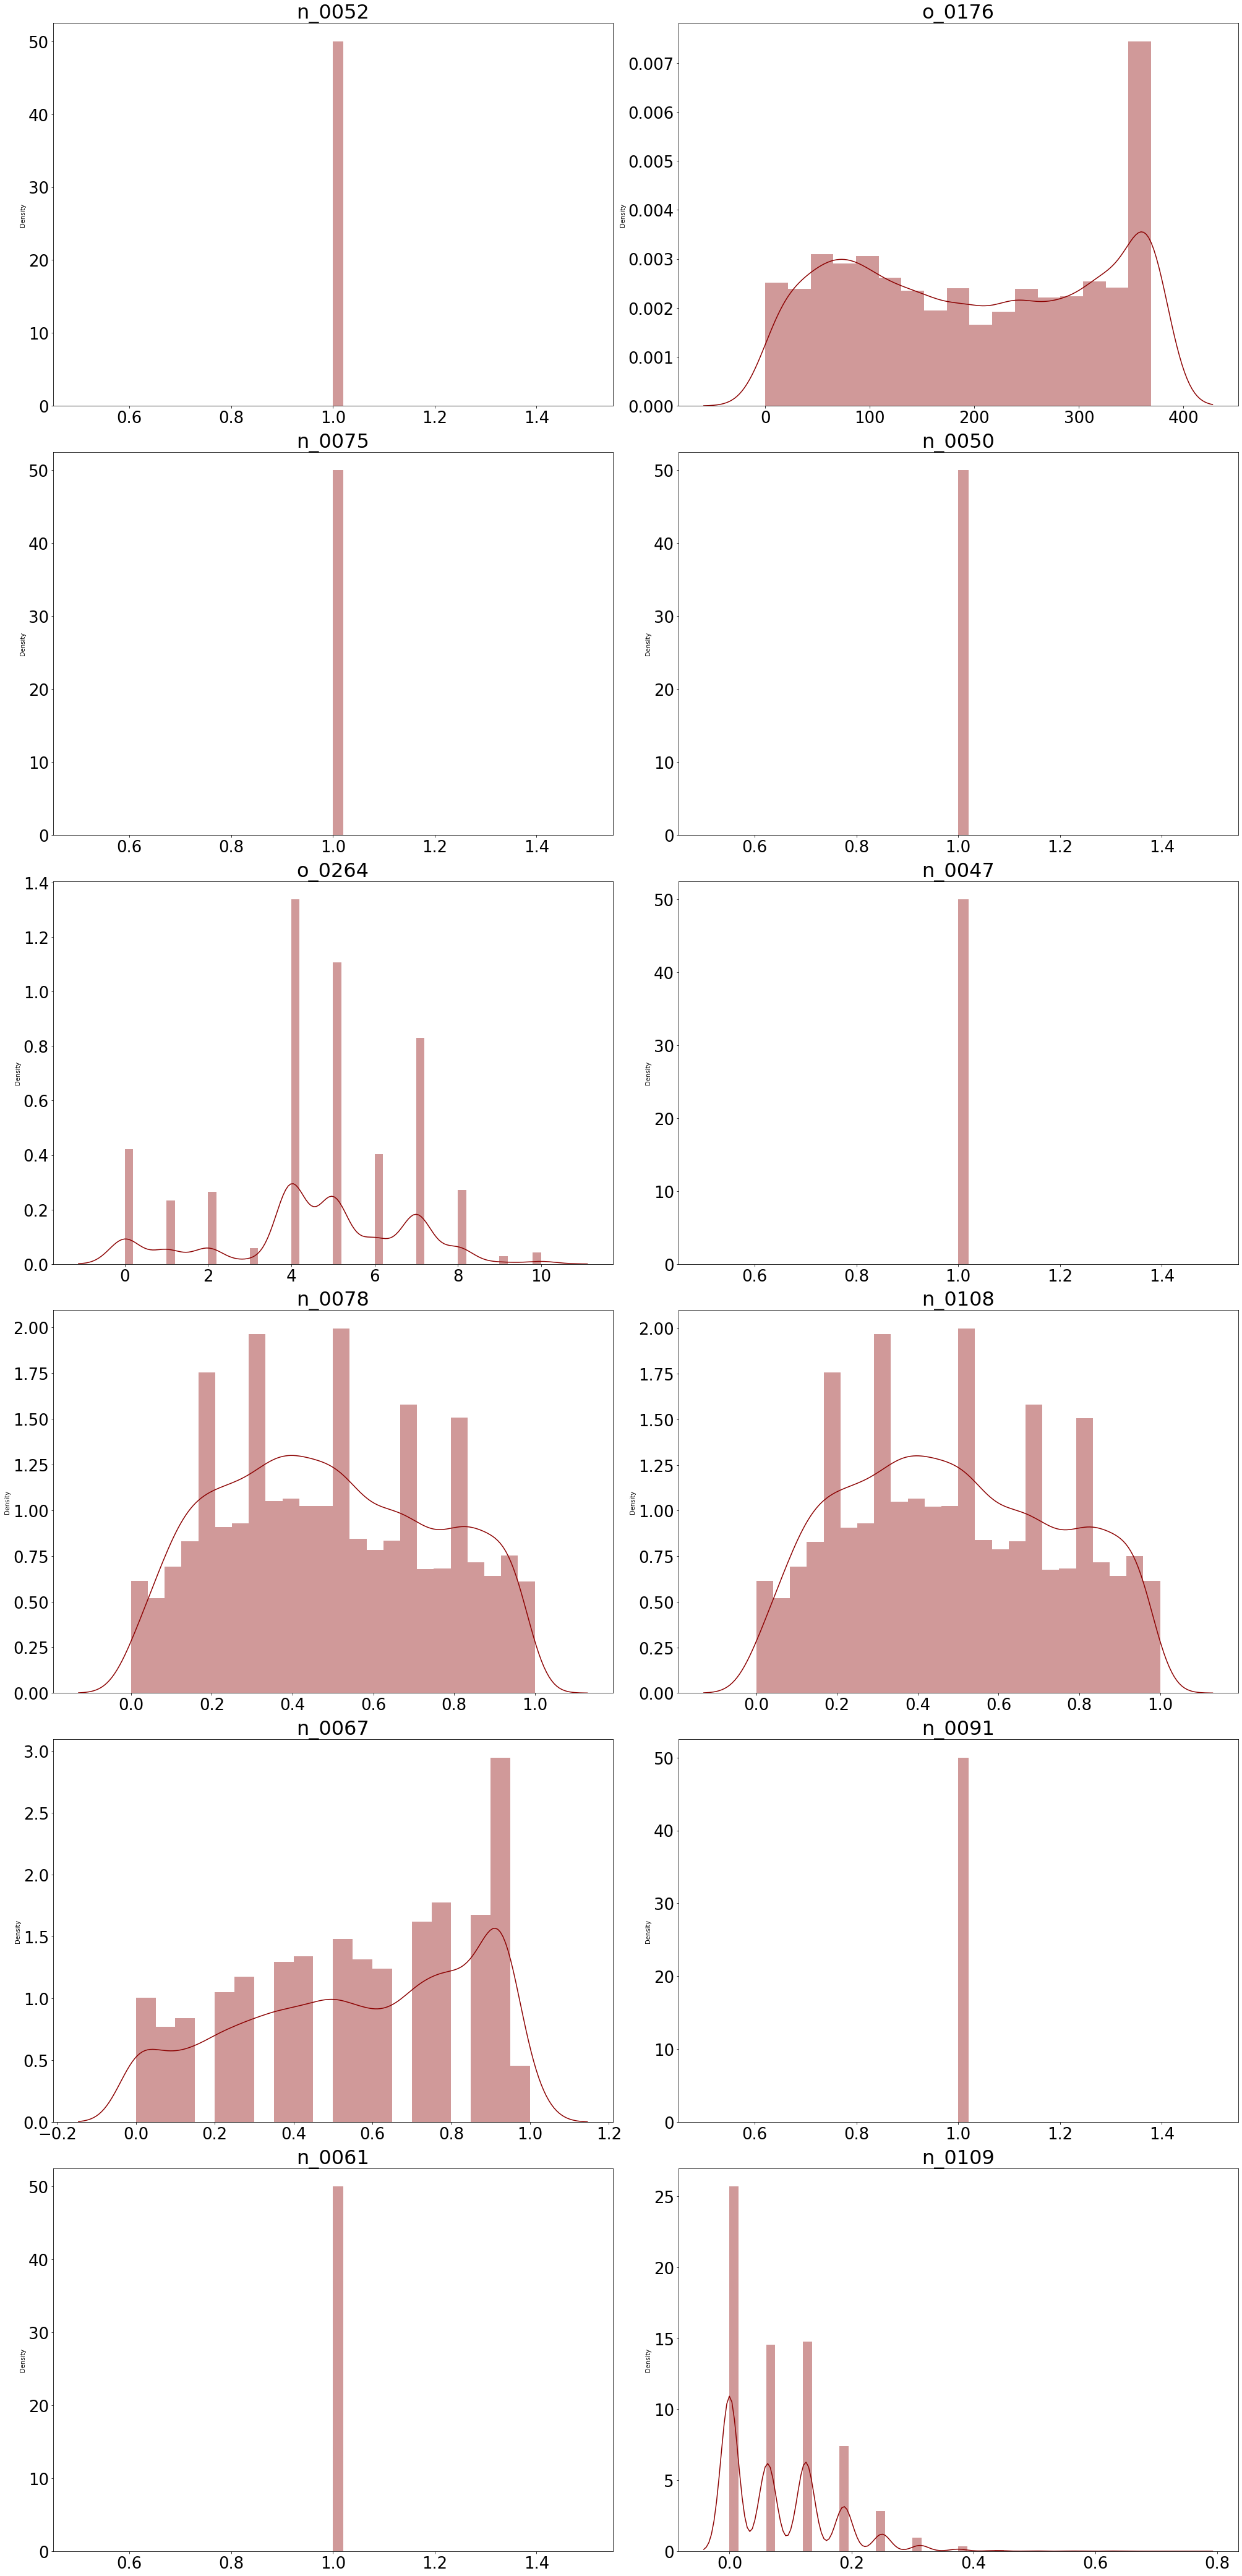

In [42]:
fig, axes = plt.subplots(nrows = 6, ncols = 2, figsize = (28, 63))

for ax, column in zip(axes.flatten(), train[noNAs].select_dtypes(include=numerics).columns):
    sns.distplot(train[column], ax = ax, color = 'darkred')
    
    ax.set_title(column, fontsize = 32)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 26)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 26)
    ax.set_xlabel('')
    
fig.tight_layout(rect = [0, 0.03, 1, 0.95])

У нас есть не несущие в себе информацию столбцы, а именно те, кто состоят из одних 1. А также есть полностью NA'шные столбцы, не несущие, получается, также никакой информации.

Давайте удалим их, а также среди достаточно полных NA'шных аналогичные (заполненные лишь одним значением) столбцы.

In [43]:
train_dropped = []
for col in train.columns:
    if (train[col].isnull().sum() <= 1000) & (len(train[col].value_counts()) == 1) or \
        (train[col].isnull().sum() == train.shape[0]):
            train_dropped.append(col)
            train = train.drop(col, axis=1)

In [44]:
test_dropped = []
for col in test.columns:
    if (test[col].isnull().sum() <= 1000) & (len(test[col].value_counts()) == 1) or \
        (test[col].isnull().sum() == test.shape[0]):
            test_dropped.append(col)
            test = test.drop(col, axis=1)

Проверим, выкинули ли мы только одинаковые колонки.

In [45]:
sorted(train_dropped) == sorted(test_dropped)

True

Проверим вообще, остались ли у нас одинаковые столбцы в train и test, или что-то поломалось.

In [46]:
sorted(train.columns) == sorted(test.columns)

True

Так, все хорошо. Это радует.

In [47]:
bold("**Mean percentage of missing values among train columns with NaNs:**")
display(
        (train.isnull().sum() / len(train) * 100).mean(),
        np.median(np.array((train.isnull().sum() / len(train) * 100)))
)

**Mean percentage of missing values among train columns with NaNs:**

80.46380471380472

94.81875

Было:
<br>82.65881073241479
<br>97.46249999999999

In [48]:
bold("**Mean percentage of missing values among test columns with NaNs:**")
display(
        (test.isnull().sum() / len(test) * 100).mean(),
        np.median(np.array((test.isnull().sum() / len(test) * 100)))
)

**Mean percentage of missing values among test columns with NaNs:**

80.14276094276094

94.55

Было:
<br>82.38531544597535
<br>97.3

In [49]:
bold('**Shape of our train &test data:**')
display(train.shape, test.shape)

**Shape of our train &test data:**

(8000, 1188)

(2000, 1188)

Было:
<br>(8000, 1379)
<br>(2000, 1379)

Минус 191 столбец.

В общем, информативность чутка у нас повысилась, ура.

Теперь вспомним, что у нас есть относительно небольше число столбцов, где NA'шек относительно немного + это numeric столбцы.

In [50]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
almost_good_cols = []

for col in train.select_dtypes(include=numerics).columns:
    if (train[col].isnull().sum() <= 1000) & (train[col].isnull().sum() > 0):
        almost_good_cols.append(col)
        
print(len(almost_good_cols))

9


А давайте построим гистограммы и для них.

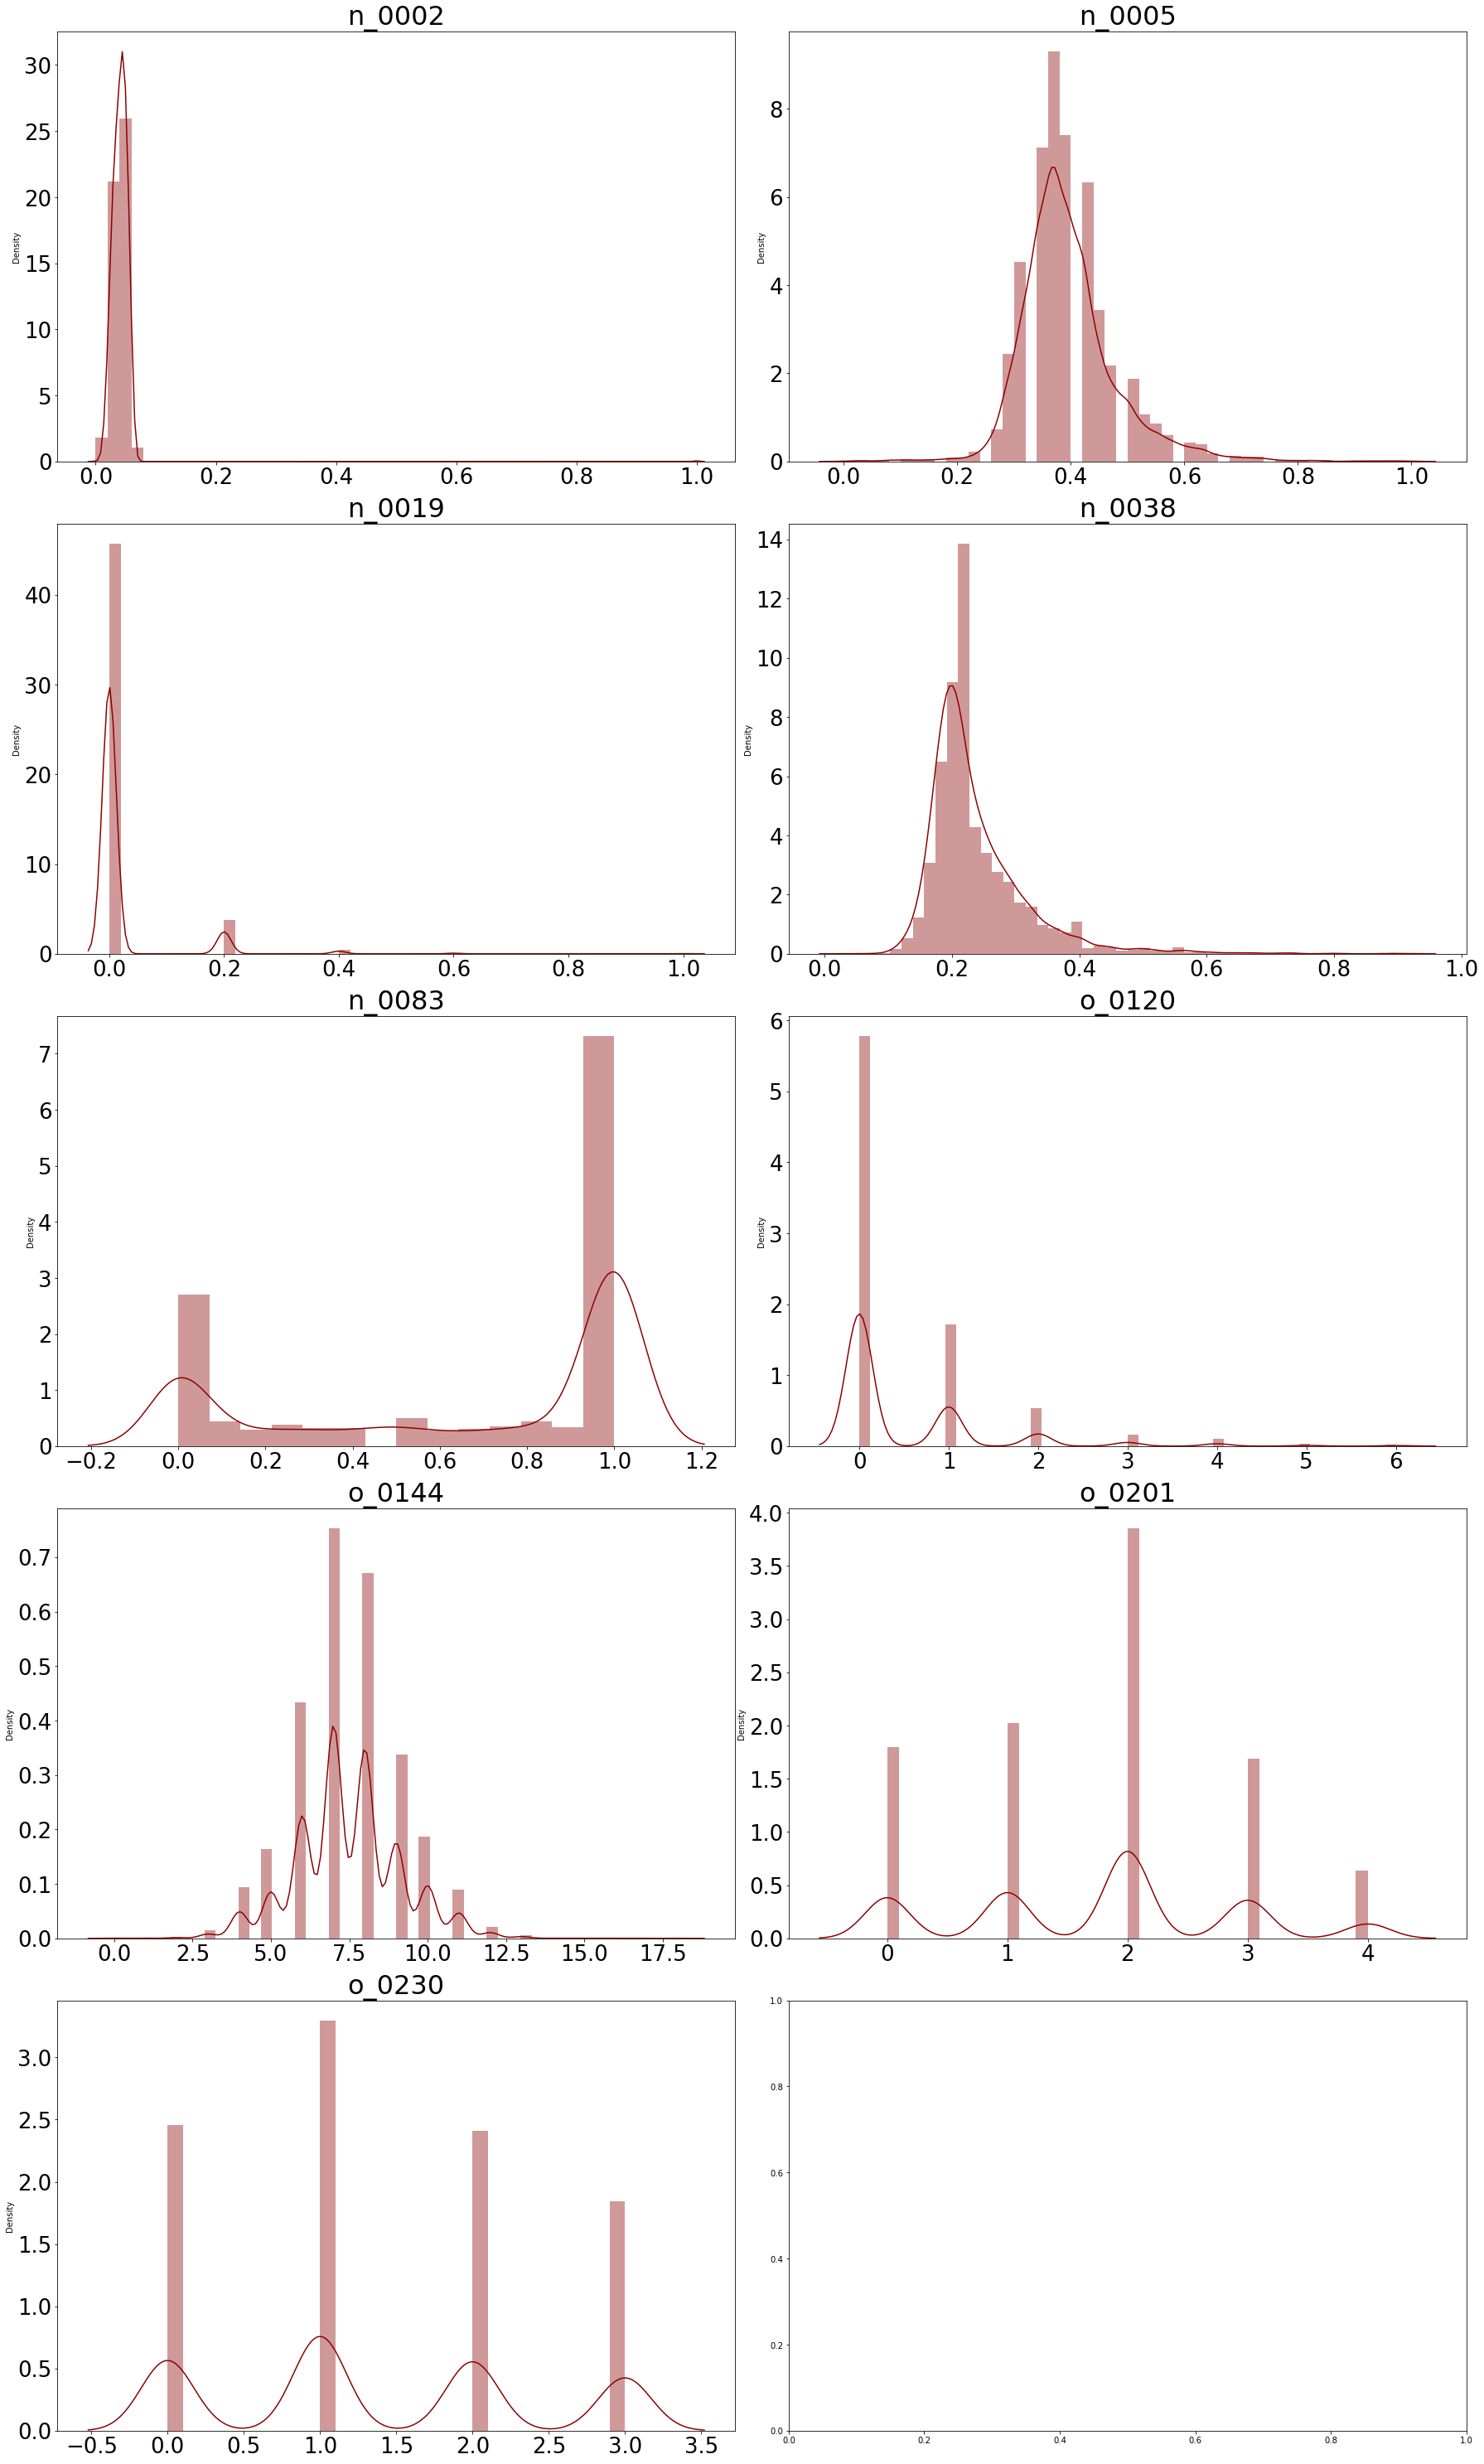

In [51]:
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (25, 45))

for ax, column in zip(axes.flatten(), train[almost_good_cols].select_dtypes(include=numerics).columns):
    sns.distplot(train[column], ax = ax, color = 'darkred')
    
    ax.set_title(column, fontsize = 32)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 26)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 26)
    ax.set_xlabel('')
    
fig.tight_layout(rect = [0, 0.03, 1, 0.95])

```n_0019``` не кажется значимым столбцом, нужно проверять на классах, где logloss плох.

Столбцы у нас делятся на 4 группы: release (особняком), n_ (самая малочисленная), o), c_ (самая многочисленная).

Давайте отдельно посмотрим на колонку release и на ее корреляцию с отрисованными колонками выше.

In [52]:
target = train['release']
target = LabelEncoder().fit_transform(target)
target

array([0, 0, 0, ..., 2, 2, 2])

Text(0.5, 3.200000000000003, '')

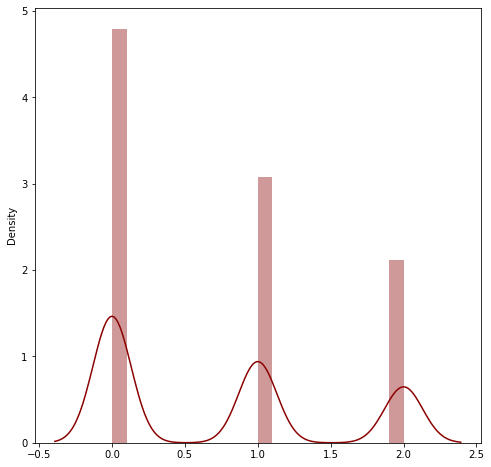

In [53]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 8))

sns.distplot(target, color = 'darkred')
    
ax.set_title(column, fontsize = 32)
ax.tick_params(axis = 'both', which = 'major', labelsize = 26)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 26)
ax.set_xlabel('')

In [54]:
train_noNas = list(train.iloc[:, list(train.isnull().any() == False)].columns)
test_noNas = list(test.iloc[:, list(test.isnull().any() == False)].columns)
noNAs = list(set(train_noNas) & set(test_noNas))

In [55]:
col_corr = list(set(noNAs).union(set(almost_good_cols)))
col_corr.remove('release')
len(col_corr)

32

False


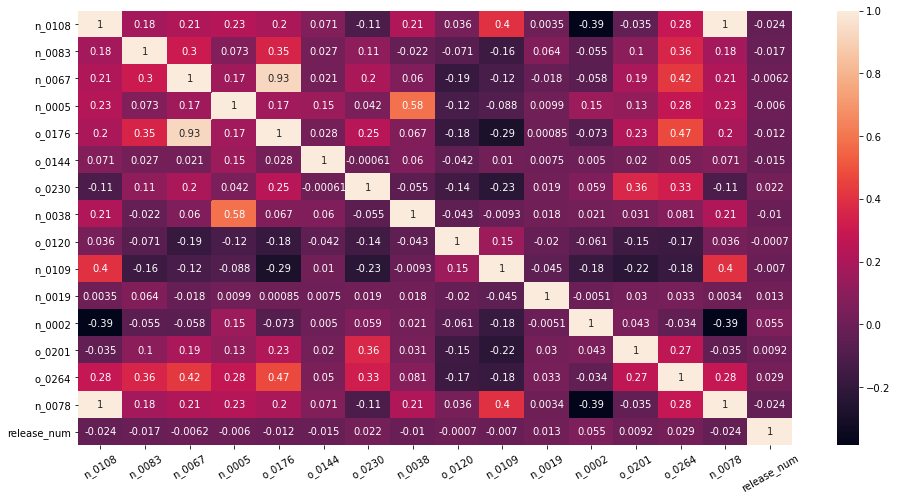

In [56]:
train['release_num'] = target
col_corr.append('release_num')

cor = train[col_corr].select_dtypes(include=numerics).corr()

train = train.drop('release_num', axis=1)


plt.figure(figsize=(16, 8))
sns.heatmap(cor, cmap='rocket', annot=True)
plt.xticks(rotation=30);

print('release_num' in train.columns)

Непосредственно на этом этапе происходил анализ все-таки release_num и при данном (мне нравится) способе кодирования release_num выглядит значимым признаком (да и по смыслу все же тоже предполагалось).

<br>Насчет остальных жестких корреляций бы сказал так, что мы чуть позже подчистим. Перед зафилливанием.

In [57]:
n_cols = []
o_cols = []
c_cols = []

for i in range(0, train.shape[1]):
    if ('n_' in train.columns[i]):
        n_cols.append(train.columns[i])
        
    elif ('o_' in train.columns[i]):
        o_cols.append(train.columns[i])
        
    elif ('c_' in train.columns[i]):
        c_cols.append(train.columns[i])

In [58]:
bold("**The number of columns in each group (n, o, c) for train data:**")
display(
    len(n_cols),
    len(o_cols),
    len(c_cols)
)

**The number of columns in each group (n, o, c) for train data:**

105

172

910

In [59]:
n_cols_test = []
o_cols_test = []
c_cols_test = []

for i in range(0, test.shape[1]):
    if ('n_' in test.columns[i]):
        n_cols_test.append(test.columns[i])
        
    elif ('o_' in test.columns[i]):
        o_cols_test.append(test.columns[i])
        
    elif ('c_' in test.columns[i]):
        c_cols_test.append(test.columns[i])

In [60]:
bold("**The number of columns in each group (n, o, c) for test data:**")
display(
    len(n_cols_test),
    len(o_cols_test),
    len(c_cols_test)
)

**The number of columns in each group (n, o, c) for test data:**

105

172

910

Такое же соотношение, что логично -- мы же почистили ровно.

In [61]:
n_noNas = list(train[n_cols].iloc[:, list(train[n_cols].isnull().any() == False)].columns)

bold("**Columns with no missing values in train data's n_cols:**")
display(
    len(n_noNas),
    train[n_noNas].dtypes
)

**Columns with no missing values in train data's n_cols:**

4

n_0067    float64
n_0078    float64
n_0108    float64
n_0109    float64
dtype: object

In [62]:
n_noNas_test = list(test[n_cols_test].iloc[:, list(test[n_cols_test].isnull().any() == False)].columns)

bold("**Columns with no missing values in test data's n_cols:**")
display(
    len(n_noNas_test),
    test[n_noNas_test].dtypes
)

**Columns with no missing values in test data's n_cols:**

4

n_0067    float64
n_0078    float64
n_0108    float64
n_0109    float64
dtype: object

In [63]:
bold("**Mean percentage of missing values among train n_cols with NaNs:**")
display(
        (train[n_cols].isnull().sum() / len(train[n_cols]) * 100).mean(),
        np.median(np.array((train[n_cols].isnull().sum() / len(train[n_cols]) * 100)))
)

**Mean percentage of missing values among train n_cols with NaNs:**

81.36773809523811

95.15

In [64]:
o_noNas = list(train[o_cols].iloc[:, list(train[o_cols].isnull().any() == False)].columns)

bold("**Columns with no missing values in train data's o_cols:**")
display(
    len(o_noNas),
    train[o_noNas].dtypes
)

**Columns with no missing values in train data's o_cols:**

2

o_0176    int64
o_0264    int64
dtype: object

In [65]:
o_noNas_test = list(test[o_cols_test].iloc[:, list(test[o_cols_test].isnull().any() == False)].columns)

bold("**Columns with no missing values in test data's o_cols:**")
display(
    len(o_noNas_test),
    test[o_noNas_test].dtypes
)

**Columns with no missing values in test data's o_cols:**

2

o_0176    int64
o_0264    int64
dtype: object

In [66]:
bold("**Mean percentage of missing values among train o_cols with NaNs:**")
display(
        (train[o_cols].isnull().sum() / len(train[o_cols]) * 100).mean(),
        np.median(np.array((train[o_cols].isnull().sum() / len(train[o_cols]) * 100)))
)

**Mean percentage of missing values among train o_cols with NaNs:**

86.20719476744186

96.38749999999999

In [67]:
c_noNas = list(train[c_cols].iloc[:, list(train[c_cols].isnull().any() == False)].columns)

bold("**Columns with no missing values in train data's c_cols:**")
display(
    len(c_noNas),
    train[c_noNas].dtypes
)

**Columns with no missing values in train data's c_cols:**

18

c_0466    object
c_0500    object
c_0638    object
c_0699    object
c_0738    object
c_0761    object
c_0770    object
c_0838    object
c_0870    object
c_0980    object
c_1145    object
c_1158    object
c_1189    object
c_1223    object
c_1227    object
c_1244    object
c_1259    object
c_1348    object
dtype: object

In [68]:
c_noNas_test = list(test[c_cols_test].iloc[:, list(test[c_cols_test].isnull().any() == False)].columns)

bold("**Columns with no missing values in test data's c_cols:**")
display(
    len(c_noNas_test),
    test[c_noNas_test].dtypes
)

**Columns with no missing values in test data's c_cols:**

20

c_0368    object
c_0466    object
c_0500    object
c_0638    object
c_0699    object
c_0738    object
c_0761    object
c_0770    object
c_0838    object
c_0870    object
c_0980    object
c_0996    object
c_1004    object
c_1145    object
c_1158    object
c_1189    object
c_1223    object
c_1227    object
c_1244    object
c_1259    object
dtype: object

In [69]:
bold("**Mean percentage of missing values among train c_cols with NaNs:**")
display(
        (train[c_cols].isnull().sum() / len(train[c_cols]) * 100).mean(),
        np.median(np.array((train[c_cols].isnull().sum() / len(train[c_cols]) * 100)))
)

**Mean percentage of missing values among train c_cols with NaNs:**

79.36236263736264

94.25625

In [70]:
c_full_train = list(
    set(c_noNas) - set(c_noNas_test)
)
c_full_test = list(
    set(c_noNas_test) - set(c_noNas)
)

print(
    c_full_train,
    c_full_test,
    sep='\n'
)

['c_1348']
['c_0368', 'c_0996', 'c_1004']


In [71]:
c_noNas.remove('c_1348')
c_noNas_test.remove('c_0368')
c_noNas_test.remove('c_0996')
c_noNas_test.remove('c_1004')

c_noNas_full = c_noNas + c_full_train
c_noNas_full_test = c_noNas_test + c_full_test


print(
    list(set(c_noNas) - set(c_noNas_test)),
    list(set(c_noNas_test) - set(c_noNas)),
    sep='\n'
)

[]
[]


Вот только для с-колонок оказалось другое зафилливание. Вообще все колонки сохраняем: одна вообще класс (train), а другие 3 круто зафиллить нужно будет (test).

Да уж, видимо, есть какие-то офигенные колонки, хотя в среднем оч плохо.
<br>Нужно бы найти это офигенные колонки.

По всей видимости, группы различаются как минимум типами (float64, int64, string). Проверим это:

In [72]:
print('n_cols types: ', set(train[n_cols].dtypes), '\n',
     'o_cols types: ',  set(train[o_cols].dtypes), '\n',
     'c_cols types: ',  set(train[c_cols].dtypes),
     sep='')

n_cols types: {dtype('float64')}
o_cols types: {dtype('float64'), dtype('int64')}
c_cols types: {dtype('O')}


Посмотрим на соотношение типов в ```o_cols```:

In [73]:
bold("**Train o_cols types:**")

display(
    train[o_cols].dtypes.value_counts()
)

**Train o_cols types:**

float64    170
int64        2
dtype: int64

Полагаю, отдельно еще посмотрим на такое подразбиение внутри групп.

<br>Пока еще напоследок посмотрим, сколько в каждой группе не совсем отвратных столбцов (<= 7000 NAs).

In [74]:
bold("**Number of Not-So-Bad Columns in n_cols:**")
display(
    str(
        len(
            train[n_cols][(train[n_cols].isnull().sum() <= 7000).index[(train[n_cols].isnull().sum() <= 7000)]].columns
        )
    ) + \
    ' of ' + \
    str(
        len(
            n_cols
        )
    )
)

**Number of Not-So-Bad Columns in n_cols:**

'37 of 105'

In [75]:
bold("**Number of Not-So-Bad Columns in o_cols:**")
display(
    str(
        len(
            train[o_cols][(train[o_cols].isnull().sum() <= 7000).index[(train[o_cols].isnull().sum() <= 7000)]].columns
        )
    ) + \
    ' of ' + \
    str(
        len(
            o_cols
        )
    )
)

**Number of Not-So-Bad Columns in o_cols:**

'50 of 172'

In [76]:
bold("**Number of Not-So-Bad Columns in c_cols:**")
display(
    str(
        len(
            train[c_cols][(train[c_cols].isnull().sum() <= 7000).index[(train[c_cols].isnull().sum() <= 7000)]].columns
        )
    ) + \
    ' of ' + \
    str(
        len(
            c_cols
        )
    )
)

**Number of Not-So-Bad Columns in c_cols:**

'310 of 910'

Если честно, то нам все равно в будущем придется делать понижение размерности. Почему бы просто не поработать только с не такими уж и плохими столбцами (мб и понижение никакое делать не нужно будет)? Подумаем над этим чуть позже.

---

## Gap filling: part I + finishing the baseline models

Заметим, что категориальных столбцов больше, чем остальных вместе взятых. Посмотрим на них и доделаем baseline model.

In [77]:
train['c_0466']  

0       a
1       a
2       c
3       c
4       b
       ..
7995    b
7996    c
7997    a
7998    b
7999    a
Name: c_0466, Length: 8000, dtype: object

Если честно, то мне выглядит довольно разумным кодировать все через ```OneHotEncoder```, правда, в будущем нам, возможно, придется работать с большим числом столбцов, тогда ```OneHotEncoder``` нам может не особо подойти.

In [78]:
train_ohe = train.copy()
train_ohe = OneHotEncoder(handle_unknown="ignore").fit_transform(train_ohe[c_noNas_full])

In [79]:
bold('**Shape of our train & train_ohe data:**')
display(train[c_noNas_full].shape, train_ohe.shape)

**Shape of our train & train_ohe data:**

(8000, 18)

(8000, 101)

In [80]:
lr = LogisticRegression(
    solver='lbfgs',
    random_state=42,
    n_jobs=-1
)

svc = SVC(
    kernel='sigmoid',
    probability=True,
    random_state=42
)

# Данные нужно нормализовать, но они тут на глаз (да, не хорошо) все на [0, 1]
knnc = KNeighborsClassifier(
    n_neighbors=6,    ## В среднем у нас объект всего к чуть больше, чем 3м классам принадлежит
    radius=0.25,
    n_jobs=-1
)

lgbmc = LGBMClassifier()

cbc = CatBoostClassifier(verbose=0)


models = {
    'LR': lr,
    'SVC': svc,
    'kNNC': knnc,
    'LGBM': lgbmc,
    'CB': cbc
}
predicts = []

In [81]:
for m in range(0, len(models)):
    model = list(models.values())[m]
    model_name = list(models)[m]
        
    t0 = time.time()
    
    for K in range(0, labels.shape[1]):
        cv_values = cross_val_score(
            model,
            train_ohe,
            labels.iloc[:, K],
            cv=4,
            scoring='neg_log_loss'
        )
        
        predicts.append(-cv_values.max())
        print(model_name + " " + str(K) + " test logloss = %.4f" % predicts[K])
            
    t1 = time.time()
    print()
    print(model_name + " took {:.2} s".format(t1 - t0))
    
    print('---------------')
    print(model_name + ' test multiclass LogLoss = %.4f' % (sum(predicts) / len(predicts)))
    print('\n')
    predicts.clear()

LR 0 test logloss = 0.4191
LR 1 test logloss = 0.5158
LR 2 test logloss = 0.5258
LR 3 test logloss = 0.0563
LR 4 test logloss = 0.1894
LR 5 test logloss = 0.1121
LR 6 test logloss = 0.1801
LR 7 test logloss = 0.4803
LR 8 test logloss = 0.0754
LR 9 test logloss = 0.3803
LR 10 test logloss = 0.4720
LR 11 test logloss = 0.2809
LR 12 test logloss = 0.2426
LR 13 test logloss = 0.4204

LR took 4.6 s
---------------
LR test multiclass LogLoss = 0.3107


SVC 0 test logloss = 0.6050
SVC 1 test logloss = 0.6092
SVC 2 test logloss = 0.5657
SVC 3 test logloss = 0.0703
SVC 4 test logloss = 0.2034
SVC 5 test logloss = 0.1251
SVC 6 test logloss = 0.1951
SVC 7 test logloss = 0.5844
SVC 8 test logloss = 0.0794
SVC 9 test logloss = 0.4154
SVC 10 test logloss = 0.5172
SVC 11 test logloss = 0.3259
SVC 12 test logloss = 0.2919
SVC 13 test logloss = 0.4541

SVC took 3.6e+02 s
---------------
SVC test multiclass LogLoss = 0.3602


kNNC 0 test logloss = 1.1619
kNNC 1 test logloss = 1.4766
kNNC 2 test logloss 

Было:
<br>LR test multiclass LogLoss = 0.3475
<br>SVC test multiclass LogLoss = 0.3754
<br>kNNC test multiclass LogLoss = 1.3326
<br>LGBM test multiclass LogLoss = 0.3565
<br>CB test multiclass LogLoss = 0.3467

Видим, что работа только с категориальными признаками, в принципе, довольно значимо подняла скор.

Также, дальше однозначно будет работать только с LR и CB.
<br>Причем в этот раз CB показал себя похуже LR.

---